In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
274,7.13,4.0,1
776,7.08,30.0,0
11,6.38,7.0,1
232,7.77,34.0,0
423,8.27,26.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


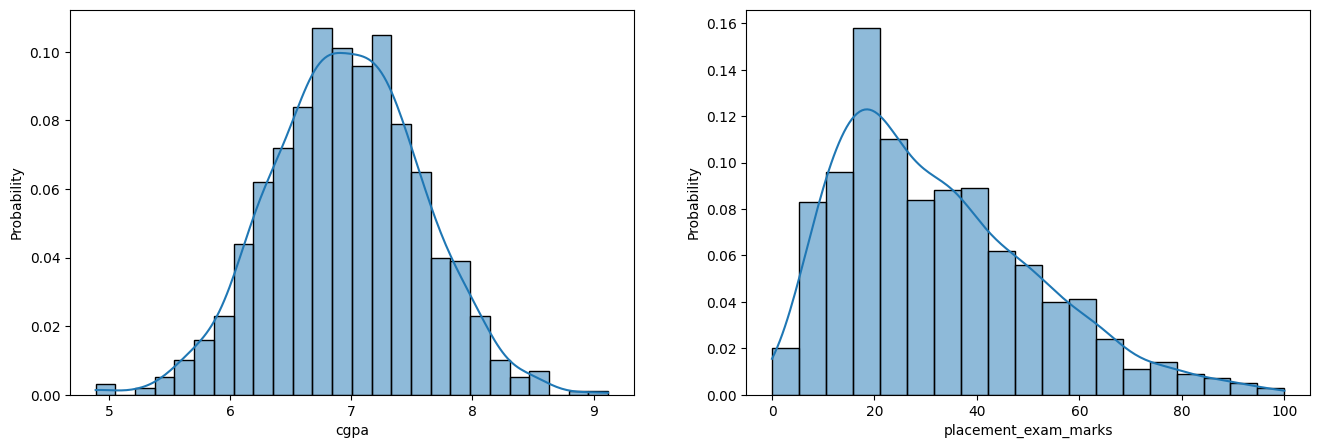

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True,stat='probability',legend=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True,stat='probability',legend=True)

plt.show()


## Note:
    1. cgpa is normally distributed hence z-score method cn be applied to it.

In [9]:
print(f"Mean value of cgpa:{df['cgpa'].mean()}")
print(f"Standard Deviation Value of cgpa:{df['cgpa'].std()}")
print(f"Minimum value of cgpa:{df['cgpa'].min()}")
print(f"Maximum value of cgpa:{df['cgpa'].max()}")

Mean value of cgpa:6.96124
Standard Deviation Value of cgpa:0.6158978751323896
Minimum value of cgpa:4.89
Maximum value of cgpa:9.12


## Boundary Value Calculation:
    1. Upper: mean + 3*std
    2. Lower: mean-3*std

In [10]:
print('Highest Value allowed:',df['cgpa'].mean()+3*df['cgpa'].std())
print('Lowest Value allowed:',df['cgpa'].mean()-3*df['cgpa'].std())

Highest Value allowed: 8.808933625397168
Lowest Value allowed: 5.113546374602832


## Outlier Detection

In [11]:
df[ (df['cgpa'] > 8.80) | (df['cgpa'] < 5.11) ] # Outlier in cgpa

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [12]:
df_updated = df[ (df['cgpa'] < 8.80) & (df['cgpa'] >5.11) ]
df_updated

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Approach 2 calculate Z-score for each column

In [13]:
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std() 

In [14]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [15]:
# since our assumption was -3 to 3
df[df['cgpa_zscore'] > 3] #{Right side outliers}

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [16]:
df[df['cgpa_zscore'] < -3] # {left side outliers}

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)] 

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [18]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)] 

In [19]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [20]:
Upper_Limit = df['cgpa'].mean()+3*df['cgpa'].std()
Lower_Limit = df['cgpa'].mean()-3*df['cgpa'].std()

In [21]:
Upper_Limit

8.808933625397168

In [22]:
Lower_Limit

5.113546374602832

# np.where(x,y,z)
    x = condition
    y = if condtion is true what value it should replace
    z = if false what value it should replace

In [23]:
df['cgpa'] = np.where(    
    df['cgpa'] > Upper_Limit, Upper_Limit,
    np.where(
    df['cgpa'] < Lower_Limit,Lower_Limit,df['cgpa']
    )
)


In [24]:
df.shape

(1000, 4)

In [25]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [ ]:
lower_Limit = 